In [1]:
import warnings
from time import time

import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import trange

from egor_spirin_v2 import *
from BMML1_open_tests import run_test

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
params = {
    "amin": 75,
    "amax": 90,
    "bmin": 500,
    "bmax": 600,
    "p1": 0.1,
    "p2": 0.01,
    "p3": 0.3
}
a = np.arange(params["amin"], params["amax"] + 1)
b = np.arange(params["bmin"], params["bmax"] + 1)
c = np.arange(params["amax"] + params["bmax"] + 1)
d = np.arange(2 * (params["amax"] + params["bmax"]) + 1)

# Открытые тесты

In [3]:
run_test()

pa, model 1: 	 ok; 	 time: 0.0000 seconds
pa, model 2: 	 ok; 	 time: 0.0000 seconds
pb, model 1: 	 ok; 	 time: 0.0000 seconds
pb, model 2: 	 ok; 	 time: 0.0000 seconds
pc, model 1: 	 ok; 	 time: 0.4170 seconds
pc, model 2: 	 ok; 	 time: 0.0233 seconds
pd, model 1: 	 ok; 	 time: 0.4751 seconds
pd, model 2: 	 ok; 	 time: 0.0644 seconds
pc_a, model 1: 	 ok; 	 time: 0.0339 seconds
pc_a, model 2: 	 ok; 	 time: 0.0015 seconds
pc_b, model 1: 	 ok; 	 time: 0.0062 seconds
pc_b, model 2: 	 ok; 	 time: 0.0004 seconds
pb_a, model 1: 	 ok; 	 time: 0.0000 seconds
pb_a, model 2: 	 ok; 	 time: 0.0000 seconds
pb_d, model 1: 	 ok; 	 time: 0.4839 seconds
pb_d, model 2: 	 ok; 	 time: 0.0969 seconds
pb_ad, model 1: 	 ok; 	 time: 0.1054 seconds
pb_ad, model 2: 	 ok; 	 time: 0.0393 seconds


# Найти математические ожидания и дисперсии априорных распределений

In [4]:
def expectation(prob, val):
    return np.dot(prob, val)

def variance(prob, val):
    exp_of_square = expectation(prob, val ** 2)
    square_exp = expectation(prob, val) ** 2
    return exp_of_square - square_exp

def print_stats(model, names, functions):
    print(f"Model {model}")
    for p, func in zip(names, functions):
        prob, val = func(params, model)
        exp = round(expectation(prob, val), 2)
        var = round(variance(prob, val), 2)
        print(f"\tExp(p({p})) = {exp}, Var(p({p})) = {var}")

In [5]:
print_stats(1, ["a", "b", "c", "d"], [pa, pb, pc, pd])
print_stats(2, ["a", "b", "c", "d"], [pa, pb, pc, pd])

Model 1
	Exp(p(a)) = 82.5, Var(p(a)) = 21.25
	Exp(p(b)) = 550.0, Var(p(b)) = 850.0
	Exp(p(c)) = 13.75, Var(p(c)) = 13.17
	Exp(p(d)) = 17.87, Var(p(d)) = 25.14
Model 2
	Exp(p(a)) = 82.5, Var(p(a)) = 21.25
	Exp(p(b)) = 550.0, Var(p(b)) = 850.0
	Exp(p(c)) = 13.75, Var(p(c)) = 14.05
	Exp(p(d)) = 17.87, Var(p(d)) = 26.63


# Пронаблюдать, как происходит уточнение прогноза для величины b по мере прихода новой косвенной информации

Для этого построить графики и найти мат.ожидание и дисперсию для распределений p(b), p(b|a), p(b|d), p(b|a,d) при параметрах a, d, равных мат.ожиданиям своих априорных распределений, округленных до ближайшего целого.

In [6]:
def plot_b_model(model):
    prob_a, val_a = pa(params, model)
    mean_a = np.array([int(expectation(prob_a, val_a) + 0.5)])
    prob_d, val_d = pd(params, model)
    mean_d = np.array([int(expectation(prob_d, val_d) + 0.5)])

    dist_pb, val_b = pb(params, model)
    dist_pb_a = pb_a(mean_a, params, model)[0][:, 0]
    dist_pb_d = pb_d(mean_d, params, model)[0][:, 0]
    dist_pb_ad = pb_ad(mean_a, mean_d, params, model)[0][:, 0, 0]

    print(f"Model {model}")
    plt.figure(figsize=(12, 8))
    plt.title(f"Модель {model}")
    plt.xlabel("b")
    plt.ylabel("Вероятность")
    for p, dist in zip(["b", "b | a", "b | d", "b | a, d"], [dist_pb, dist_pb_a, dist_pb_d, dist_pb_ad]):
        exp = round(expectation(dist, val_b), 2)
        var = round(variance(dist, val_b), 2)
        print(f"\tExp(p({p})) = {exp}, Var(p({p})) = {var}")
        plt.plot(val_b, dist, label=f"p({p})")
    plt.legend()
    plt.grid()
    plt.savefig(f"model_{model}.png")

Model 1
	Exp(p(b)) = 550.0, Var(p(b)) = 850.0
	Exp(p(b | a)) = 550.0, Var(p(b | a)) = 850.0
	Exp(p(b | d)) = 550.07, Var(p(b | d)) = 848.04
	Exp(p(b | a, d)) = 550.04, Var(p(b | a, d)) = 848.03


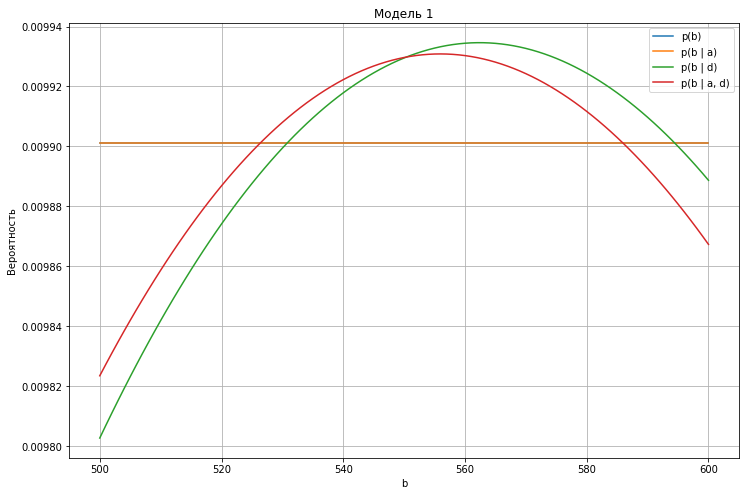

In [7]:
plot_b_model(1)

Model 2
	Exp(p(b)) = 550.0, Var(p(b)) = 850.0
	Exp(p(b | a)) = 550.0, Var(p(b | a)) = 850.0
	Exp(p(b | d)) = 550.1, Var(p(b | d)) = 848.13
	Exp(p(b | a, d)) = 550.06, Var(p(b | a, d)) = 848.12


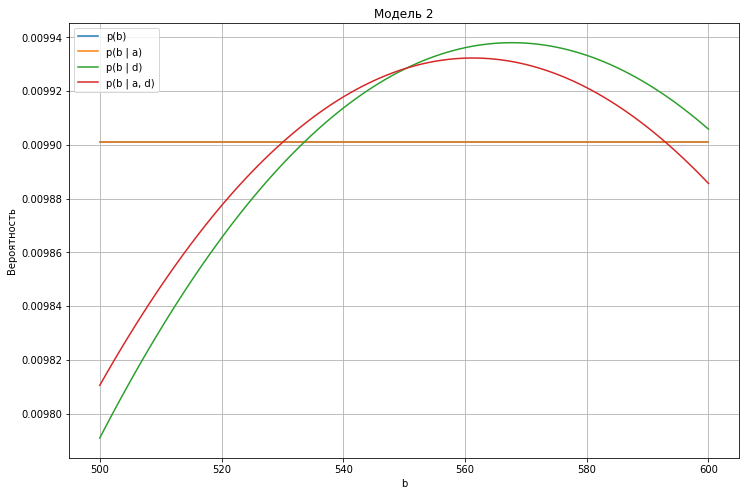

In [8]:
plot_b_model(2)

# Определить, при каких соотношениях параметров $p_1$, $p_2$ изменяется относительная важность параметров $a$, $b$ для оценки величины $c$.

Для этого найти множество точек $\{(p1,p2)| \mathbb{D}[c|b]< \mathbb{D}[c|a]\}$ при $a$,$b$, равных мат.ожиданиям своих априорных распределений, округленных до ближайшего целого. Являются ли множества $\{(p1,p2)| \mathbb{D}[c|b]< \mathbb{D}[c|a]\}$ и $\{(p1,p2)| \mathbb{D}[c|b] \ge \mathbb{D}[c|a]\}$ линейно разделимыми?

In [9]:
def get_important_mask(model, n_points=100):
    prob_a, val_a = pa(params, model)
    mean_a = np.array([int(expectation(prob_a, val_a) + 0.5)])
    prob_b, val_b = pb(params, model)
    mean_b = np.array([int(expectation(prob_b, val_b) + 0.5)])
    
    p1, p2 = np.linspace(0, 1, n_points), np.linspace(0, 1, n_points)
    res_mask = np.zeros((n_points, n_points))

    for i in trange(n_points):
        for j in range(n_points):
            cur_params = params.copy()
            cur_params["p1"] = p1[i]
            cur_params["p2"] = p2[j]
        
            dist_pc_a, val_pc_a = pc_a(mean_a, cur_params, 1) 
            dist_pc_b, val_pc_b = pc_b(mean_b, cur_params, 1)
        
            var_pc_a = variance(dist_pc_a[:, 0], val_pc_a)
            var_pc_b = variance(dist_pc_b[:, 0], val_pc_b)
        
            res_mask[i, j] = var_pc_b < var_pc_a
    return res_mask

In [10]:
mask = get_important_mask(model=1)

  0%|          | 0/100 [00:00<?, ?it/s]

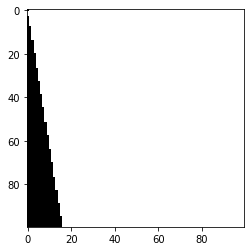

In [11]:
plt.imshow(mask, cmap="gray", interpolation="none")
plt.savefig("mask.png")

# Провести временные замеры по оценке всех необходимых распределений $p(c)$, $p(c|a)$, $p(c|b)$, $p(b|a)$, $p(b|d)$, $p(b|a,d)$, $p(d)$.

In [12]:
def timeit(func, func_args, n_times=10):
    res = []
    for _ in range(n_times):
        start_time = time()
        func(*func_args)
        res.append(time() - start_time)
    return np.mean(res), np.std(res)

def measure_model(model):
    print(f"Model {model}")
    pc_mean, pc_std = timeit(pc, [params, model])
    print(f"\tp(c): {round(pc_mean * 1000, 2)} ms +/- {round(pc_std * 1000, 2)} ms")
    pc_a_mean, pc_a_std = timeit(pc_a, [a, params, model])
    print(f"\tp(c | a): {round(pc_a_mean * 1000, 2)} ms +/- {round(pc_a_std * 1000, 2)} ms")
    pc_b_mean, pc_b_std = timeit(pc_b, [b, params, model])
    print(f"\tp(c | b): {round(pc_b_mean * 1000, 2)} ms +/- {round(pc_b_std * 1000, 2)} ms")
    pb_a_mean, pb_a_std = timeit(pb_a, [a, params, model])
    print(f"\tp(b | a): {round(pb_a_mean * 1_000_000, 2)} mcs +/- {round(pb_a_std * 1_000_000, 2)} mcs")
    pb_d_mean, pb_d_std = timeit(pb_d, [d, params, model])
    print(f"\tp(b | d): {round(pb_d_mean * 1000, 2)} ms +/- {round(pb_d_std * 1000, 2)} ms")
    pb_ad_mean, pb_ad_std = timeit(pb_ad, [a, d, params, model])
    print(f"\tp(b | a, d): {round(pb_ad_mean * 1000, 2)} ms +/- {round(pb_ad_std * 1000, 2)} ms")
    pd_mean, pd_std = timeit(pd, [params, model])
    print(f"\tp(d): {round(pd_mean * 1000, 2)} ms +/- {round(pd_std * 1000, 2)} ms")    

In [13]:
measure_model(model=1)

Model 1
	p(c): 447.54 ms +/- 19.84 ms
	p(c | a): 443.97 ms +/- 12.9 ms
	p(c | b): 482.73 ms +/- 34.64 ms
	p(b | a): 13.42 mcs +/- 9.1 mcs
	p(b | d): 532.37 ms +/- 22.7 ms
	p(b | a, d): 2636.94 ms +/- 63.79 ms
	p(d): 465.23 ms +/- 4.3 ms


In [14]:
measure_model(model=2)

Model 2
	p(c): 29.39 ms +/- 2.19 ms
	p(c | a): 28.01 ms +/- 0.33 ms
	p(c | b): 27.95 ms +/- 0.76 ms
	p(b | a): 14.62 mcs +/- 6.25 mcs
	p(b | d): 107.61 ms +/- 5.19 ms
	p(b | a, d): 2012.01 ms +/- 280.18 ms
	p(d): 69.57 ms +/- 1.71 ms
